<h1><center>Time Series Assignment</center></h1>

In a command window: conda install pandas-datareader
2. Download the adjusted close price from Google Finance for AAPL, BBRY,
LULU and AMZN using the following code:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)
aapl = web.DataReader('AAPL', 'google', start, end)
3. Get the data for the last 60 months, select the monthend close for each.
4. Use matplotlib.pyplot.acorr() to plot the autocorrelation of the monthend
close of each of the stocks. Are they autocorrelated? Why or why not?
5. Calculate the monthly return over the period for each stock using the “shift
trick” on the lecture slide titled Shifting (Note: you should end up with a time
series 59 months long)
6. Use matplotlib.pyplot.acorr() to plot the autocorrelation of the monthly
returns. Are they autocorrelated? Why or why not

In [1]:
#load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from decimal import *
from pandas.plotting import autocorrelation_plot

In [2]:
# call yahoo api to load data...
start = datetime.datetime(2012, 7, 31) 
end = datetime.datetime(2017, 6, 30) 

# api calls with 'Adj Close' column for business month (MB) by method 'pad'
aapl = web.DataReader('AAPL', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
bbry = web.DataReader('BBRY', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
lulu = web.DataReader('LULU', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
amzn = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')

In [3]:
# function to set the label of subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 
    
# function to create autocorrelation chart
def DrawAutoCorrelation(data, title):
    
    fig, axes = plt.subplots(nrows=3, figsize=(15, 12))
    
    # using tigh layout so there is no space between title and sub plots
    fig.tight_layout()
    
    # set the tilte for graph
    fig.suptitle(title, fontsize=16)
    
    label(axes[0], 'Raw Data')
    axes[0].plot(data)
    
    # create autocorrelation chart from metplotlib
    axes[1].acorr(data, maxlags=data.size-1)
    label(axes[1], 'Matplotlib Autocorrelation')
    
    # create autocorrelation char from panda through autocorrelation_plot method
    label(axes[2], 'Pandas Autocorrelation')
    pd.plotting.autocorrelation_plot(data, ax=axes[2])    
    plt.show()    

In [3]:
aapl

Date
2012-07-31     78.215111
2012-08-31     85.557686
2012-09-28     85.796921
2012-10-31     76.565155
2012-11-30     75.617699
2012-12-31     68.755913
2013-01-31     58.848927
2013-02-28     57.360882
2013-03-29     57.524616
2013-04-30     57.540211
2013-05-31     58.830223
2013-06-28     51.871002
2013-07-31     59.196491
2013-08-30     64.155190
2013-09-30     62.776531
2013-10-31     68.827049
2013-11-29     73.648575
2013-12-31     74.304169
2014-01-31     66.301849
2014-02-28     70.114929
2014-03-31     71.513916
2014-04-30     78.622139
2014-05-30     84.810448
2014-06-30     87.156464
2014-07-31     89.660568
2014-08-29     96.610054
2014-09-30     94.960625
2014-10-31    101.794014
2014-11-28    112.582008
2014-12-31    104.488365
2015-01-30    110.906487
2015-02-27    122.083282
2015-03-31    118.253304
2015-04-30    118.937569
2015-05-29    124.330093
2015-06-30    119.701591
2015-07-31    115.760208
2015-08-31    108.097336
2015-09-30    105.739059
2015-10-30    114.55

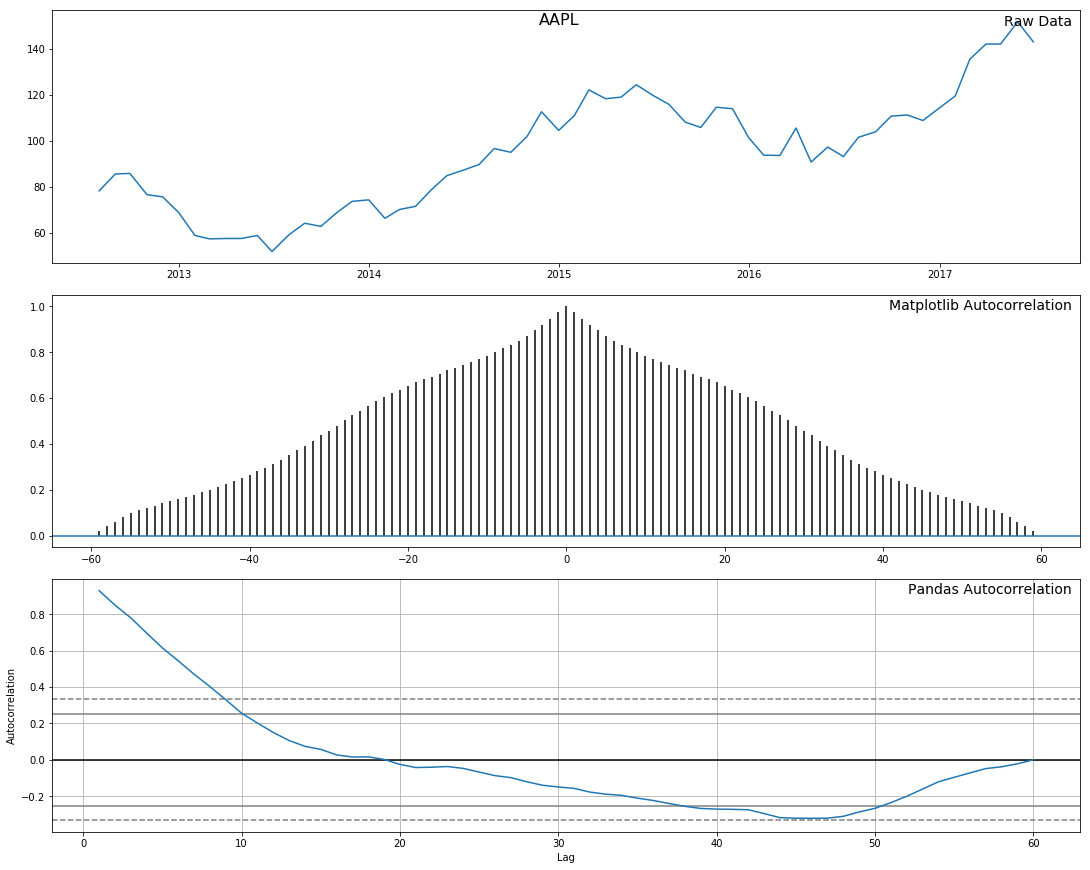

In [4]:
# create autocorrelation for AAPL
DrawAutoCorrelation(aapl, 'AAPL')

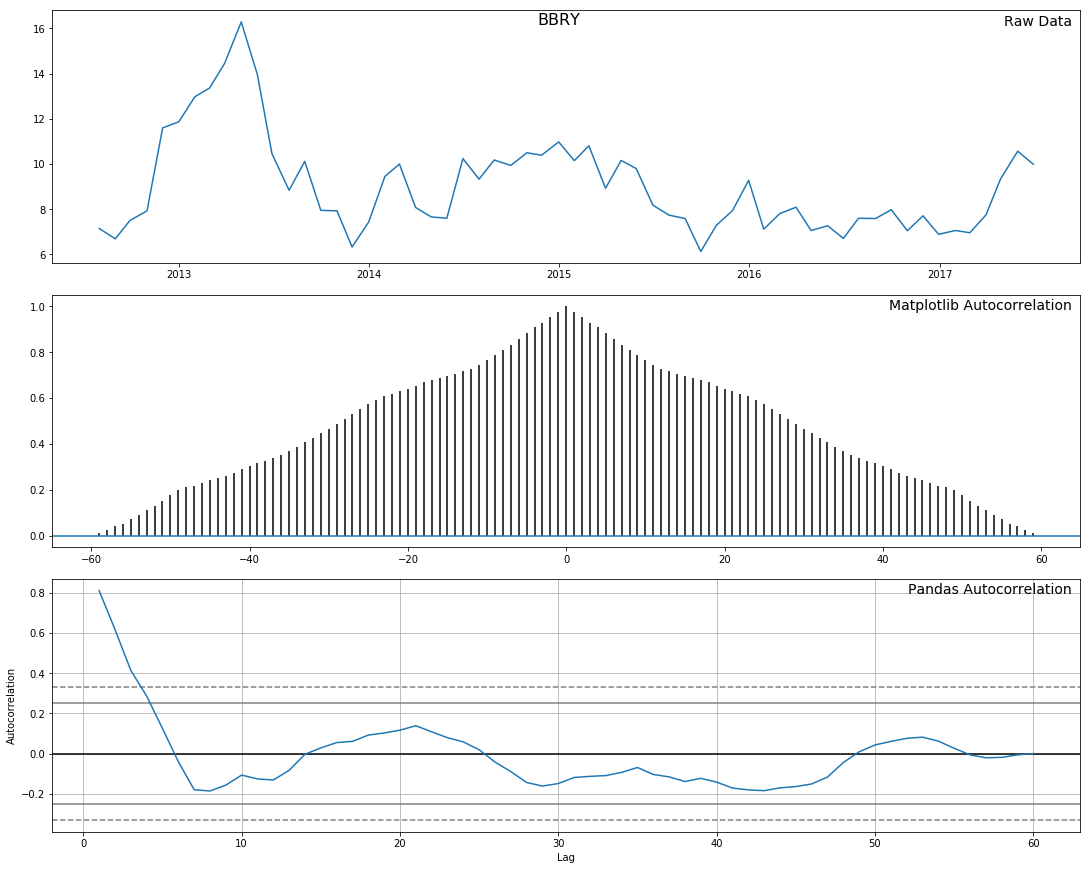

In [5]:
# create autocorrelation for BBRY
DrawAutoCorrelation(bbry, 'BBRY')

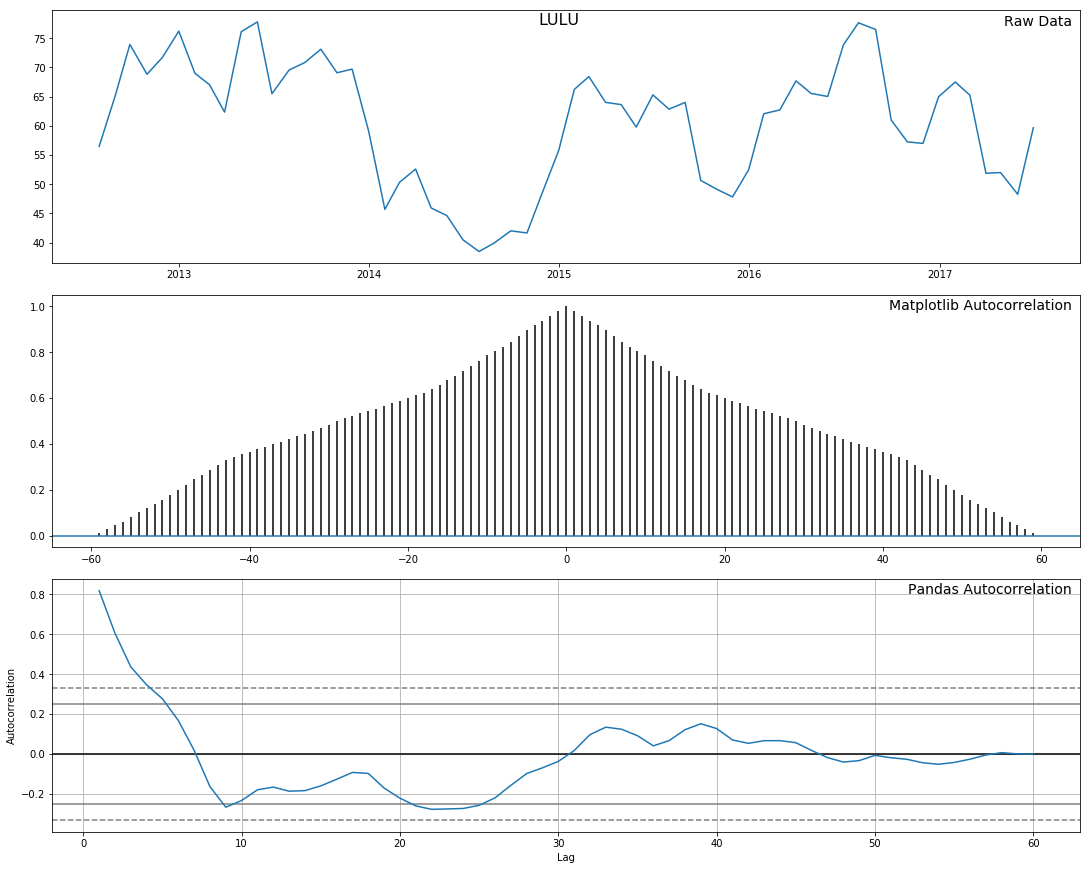

In [6]:
# create autocorrelation for LULU
DrawAutoCorrelation(lulu, 'LULU')

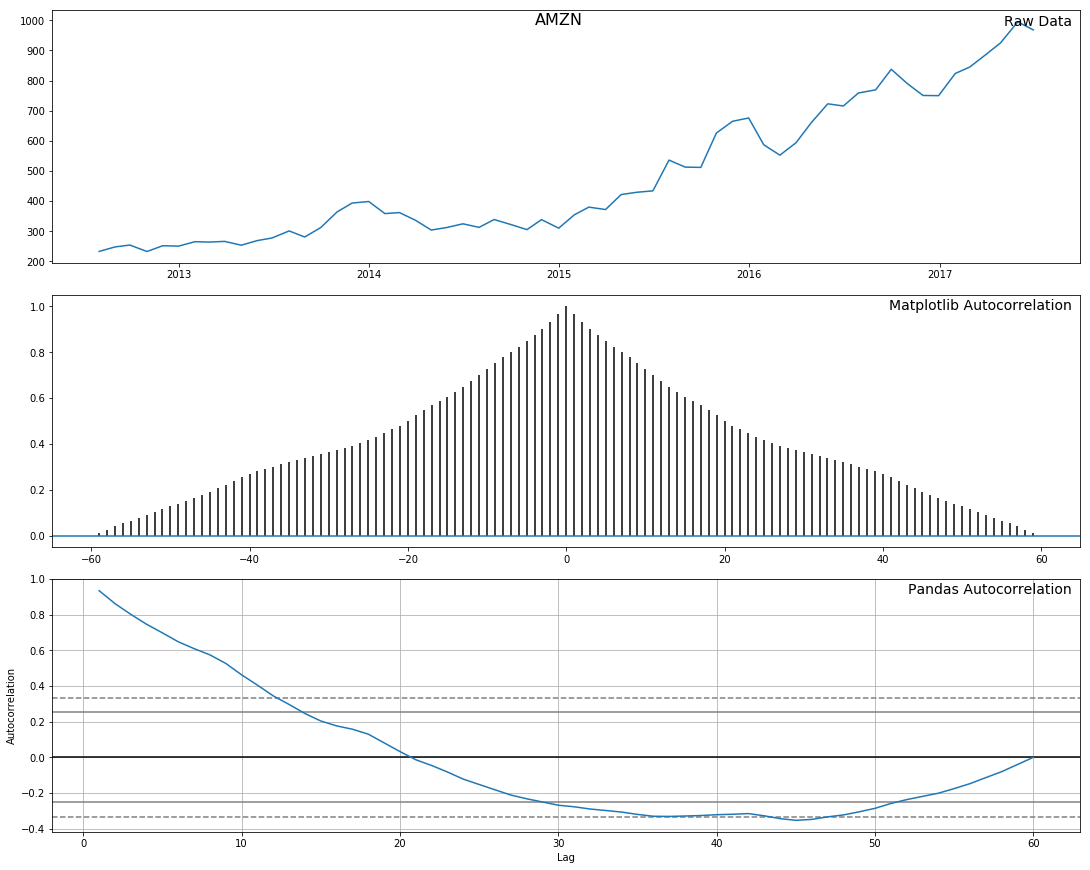

In [7]:
# create autocorrelation for AMZN
DrawAutoCorrelation(amzn, 'AMZN')

#### All above stocks are autocorrelated because the spikes are statistically significant for lags up to 60.



<h1><center>AutoCorrelation For Monthly Returns</center></h1>

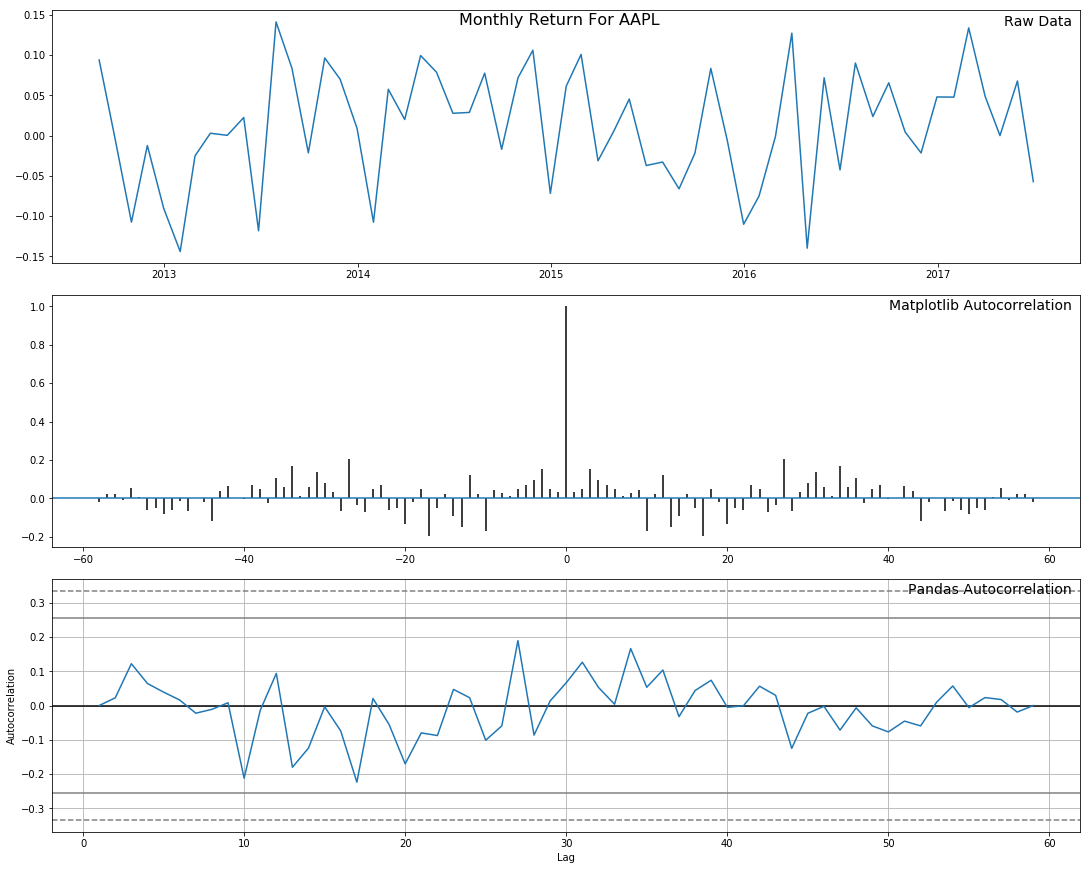

In [8]:
# create monthly return autocorrelation for AAPL
DrawAutoCorrelation((aapl / aapl.shift(1) - 1).dropna(), 'Monthly Return For AAPL')

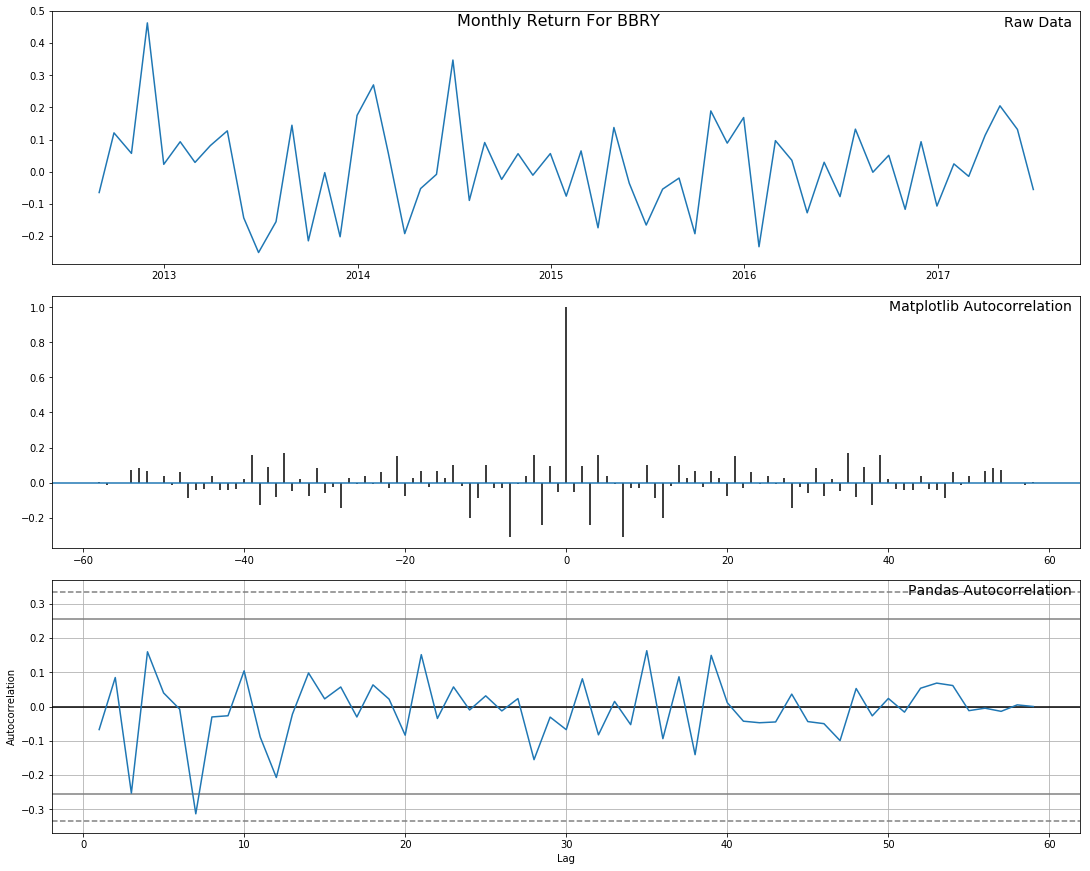

In [9]:
# create monthly return autocorrelation for BBRY
DrawAutoCorrelation((bbry / bbry.shift(1) - 1).dropna(), 'Monthly Return For BBRY')

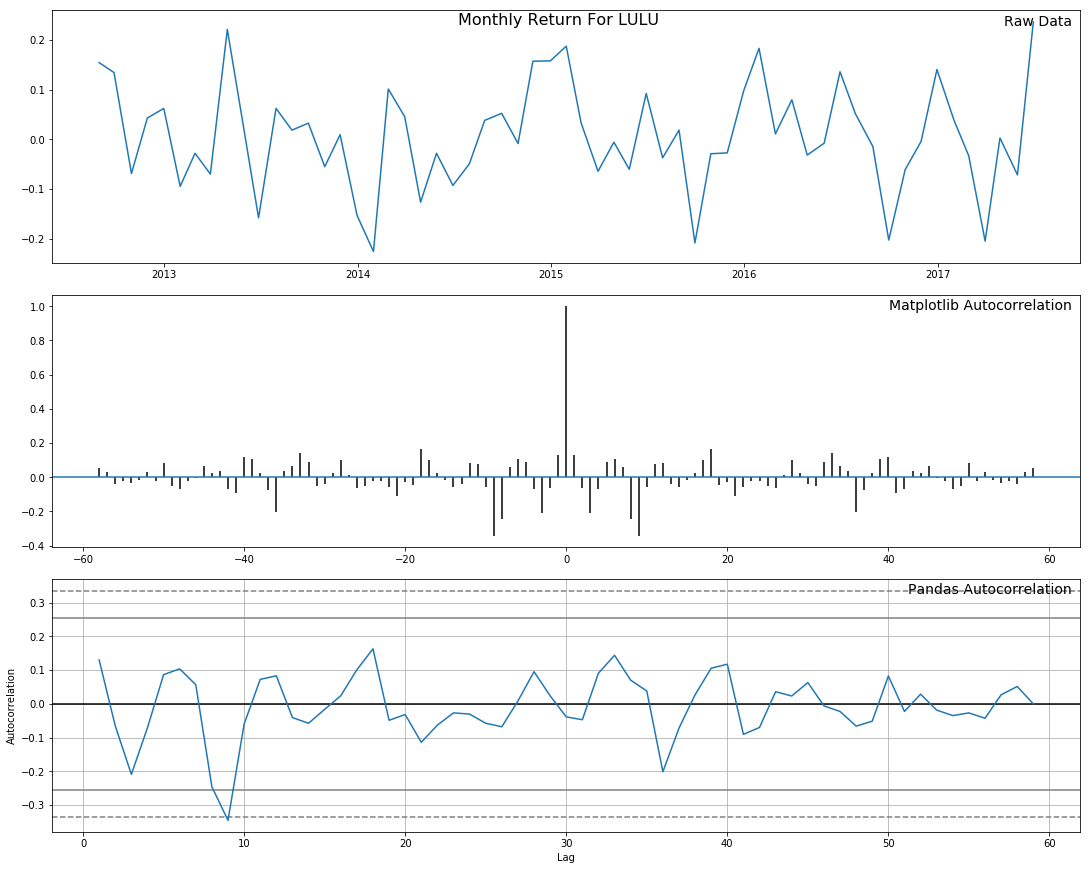

In [10]:
# create monthly return autocorrelation for LULU
DrawAutoCorrelation((lulu / lulu.shift(1) - 1).dropna(), 'Monthly Return For LULU')

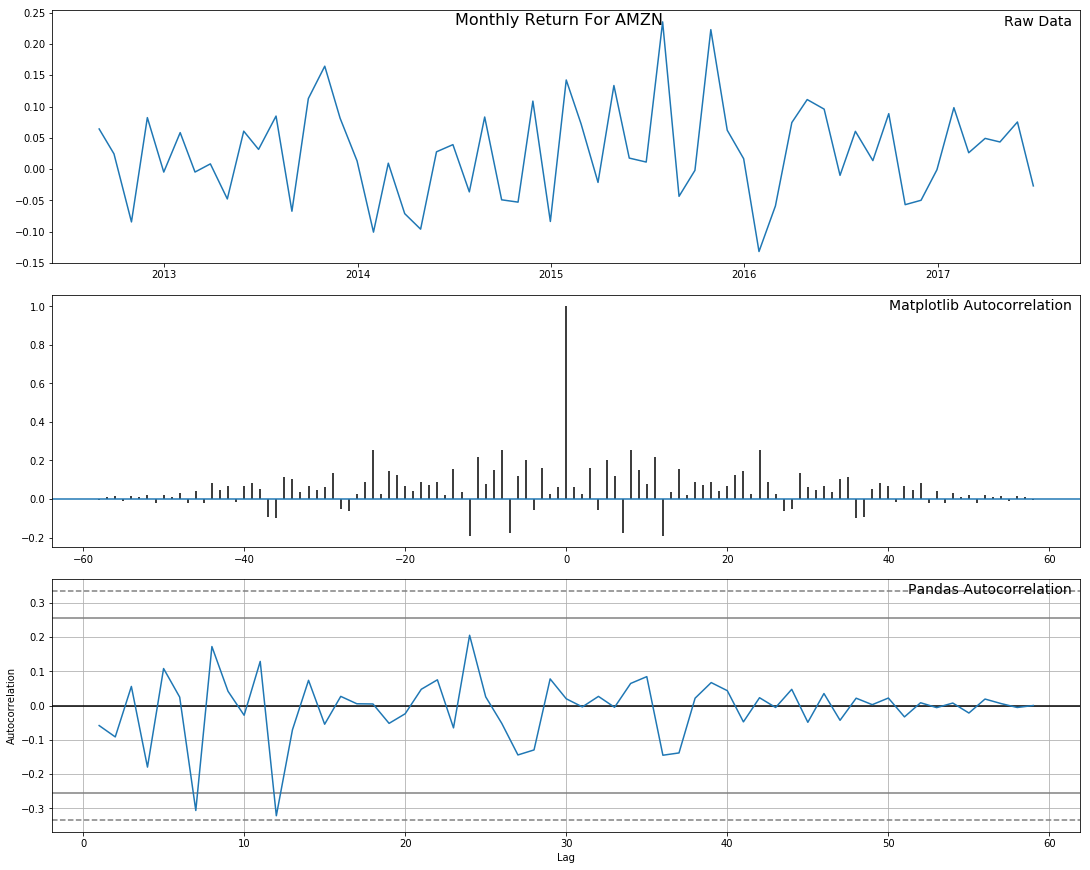

In [11]:
# create monthly return autocorrelation for AMZN
DrawAutoCorrelation((amzn / amzn.shift(1) - 1).dropna(), 'Monthly Return For AMZN')

#### The autocorrelation plot for monthly returns of all stocks shows that most of the spikes are not statistically significant. This indicates that the returns are not highly correlated.